# The Effect of the COVID-19 Pandemic on Death

As COVID-19 continues to cause significant numbers of deaths across the globe, one of the greatest talking points during the last few years has become the effect of the pandemic on our mental health, as well as the fluctuations of death numbers of various causes. The US Department of Health & Human Services keeps data for death counts for several different causes, separated by month, stretching from 2014 to 2023. In this project I will be analyzing the data and answering a few questions that are of special interest to me.

Disclaimer: The data do not discriminate by any demographic. As such, I will not be able to answer questions that are demographic-based, such as "Do younger people commit suicide more often?"

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## Importing our Data

The data are split into two sets - one from 2014-2019, and another from 2020-2023.

In [2]:
death_14_19 = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv', encoding='utf-8')
death_20_23 = pd.read_csv('Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv', encoding='utf-8')

The first data set I will leave as is, but because I want to measure data both during the height of lockdowns in 2020 and 2021 separate from data from after that (2022 and 2023), I will be splitting the second set into two.

In [3]:
death_20_21 = death_20_23[death_20_23['Year'] <= 2021]
death_22_23 = death_20_23[death_20_23['Year'] > 2021]

So now we have three tables - one from 2014-2019, one from 2020-2021, and the third from 2022-2023. I will show the head of one of the tables just to give you an example of how the table is organized.

In [4]:
death_20_21.head(12)

,Data As Of,Start Date,End Date,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,...,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,09/27/2023,01/01/2020,01/31/2020,United States,2020,1,264681,242914,3687,52635,...,4040.0,1708.0,6547.0,6,4,NaN,NaN,NaN,NaN,NaN
1,09/27/2023,02/01/2020,02/29/2020,United States,2020,2,244966,224343,3324,48764,...,3672.0,1471.0,6435.0,25,20,NaN,NaN,NaN,NaN,NaN
2,09/27/2023,03/01/2020,03/31/2020,United States,2020,3,269806,247634,3669,51640,...,3952.0,1693.0,7268.0,7175,6785,NaN,NaN,NaN,NaN,NaN
3,09/27/2023,04/01/2020,04/30/2020,United States,2020,4,322424,300780,3366,48773,...,3480.0,1756.0,7938.0,65553,62014,NaN,NaN,NaN,NaN,NaN
4,09/27/2023,05/01/2020,05/31/2020,United States,2020,5,280564,255489,3085,49012,...,3769.0,2067.0,9466.0,38330,35279,NaN,NaN,NaN,NaN,NaN
5,09/27/2023,06/01/2020,06/30/2020,United States,2020,6,250456,225455,3036,47962,...,3985.0,2261.0,8212.0,18026,15827,NaN,NaN,NaN,NaN,NaN
6,09/27/2023,07/01/2020,07/31/2020,United States,2020,7,279012,252481,3127,50626,...,4184.0,2426.0,8583.0,31135,28279,NaN,NaN,NaN,NaN,NaN
7,09/27/2023,08/01/2020,08/31/2020,United States,2020,8,277282,251071,3268,51209,...,4055.0,2348.0,8351.0,29913,27031,NaN,NaN,NaN,NaN,NaN
8,09/27/2023,09/01/2020,09/30/2020,United States,2020,9,257190,232827,3136,49671,...,3925.0,2191.0,7589.0,19158,16858,NaN,NaN,NaN,NaN,NaN
9,09/27/2023,10/01/2020,10/31/2020,United States,2020,10,273906,249366,3250,51255,...,3804.0,2368.0,7486.0,24930,22083,NaN,NaN,NaN,NaN,NaN


As we can see, the causes run along the columns, and the time periods run along the rows.

## Death Across the Board

I think it's important to vizualize overal death counts first - because when we analyze specific causes, total numbers won't be as important as proportions. As such, having access to total deaths over time is important for our purposes.

Below is a block of code that will create a list of the total death counts for every month of 2014.

In [5]:
death_14 = death_14_19[death_14_19['Year'] == 2014]  # New table for just 2014
death_14.reset_index() # Resetting the indices for the created table, allowing us to iterate
total_14 = [] # Empty List
for index, row in death_14.iterrows():
    total_14.append(row["All Cause"]) # For loop that adds each suicide count value to our list in order
print(total_14) # Prints list

[243298, 211980, 228477, 215600, 216862, 204687, 209373, 208013, 205274, 218147, 221317, 243390]


Using this framework, I will do the same for every subsequent year.

In [6]:
death_15 = death_14_19[death_14_19['Year'] == 2015]
death_15.reset_index()
total_15 = []
for index, row in death_15.iterrows():
    total_15.append(row["All Cause"])
print(total_15)

[265355, 227047, 242712, 224423, 223600, 211175, 216951, 214404, 209905, 223535, 219788, 233735]


In [7]:
death_16 = death_14_19[death_14_19['Year'] == 2016]
death_16.reset_index()
total_16 = []
for index, row in death_16.iterrows():
    total_16.append(row["All Cause"])

In [8]:
death_17 = death_14_19[death_14_19['Year'] == 2017]
death_17.reset_index()
total_17 = []
for index, row in death_17.iterrows():
    total_17.append(row["All Cause"])

In [9]:
death_18 = death_14_19[death_14_19['Year'] == 2018]
death_18.reset_index()
total_18 = []
for index, row in death_18.iterrows():
    total_18.append(row["All Cause"])

In [10]:
death_19 = death_14_19[death_14_19['Year'] == 2019]
death_19.reset_index()
total_19 = []
for index, row in death_19.iterrows():
    total_19.append(row["All Cause"])

In [11]:
death_20 = death_20_21[death_20_21['Year'] == 2020]
death_20.reset_index()
total_20 = []
for index, row in death_20.iterrows():
    total_20.append(row["All Cause"])

In [12]:
death_21 = death_20_21[death_20_21['Year'] == 2021]
death_21.reset_index()
total_21 = []
for index, row in death_21.iterrows():
    total_21.append(row["All Cause"])

In [13]:
death_22 = death_22_23[death_22_23['Year'] == 2022]
death_22.reset_index()
total_22 = []
for index, row in death_22.iterrows():
    total_22.append(row["All Cause"])

In [14]:
death_23 = death_22_23[death_22_23['Year'] == 2023]
death_23.reset_index()
total_23 = []
for index, row in death_23.iterrows():
    total_23.append(row["All Cause"])

## Graphing Death

I want to create a chart displaying the total deaths for each year, but first I have to turn our month-separated list into totals for each year.

In [15]:
combined_14 = sum(total_14) # Sums all monthly totals for 2014
combined_15 = sum(total_15)
combined_16 = sum(total_16)
combined_17 = sum(total_17)
combined_18 = sum(total_18)
combined_19 = sum(total_19)
combined_20 = sum(total_20)
combined_21 = sum(total_21)
combined_22 = sum(total_22)

all_deaths = [combined_14, combined_15, combined_16, combined_17, combined_18, 
              combined_19, combined_20, combined_21, combined_22]
print(all_deaths)

[2626418, 2712630, 2744248, 2813503, 2839205, 2854838, 3390079, 3471742, 3289236]


Above we can see a list of the total death counts for each year.

These numbers are graphed below.

Text(0, 0.5, 'Total Deaths (In Millions)')

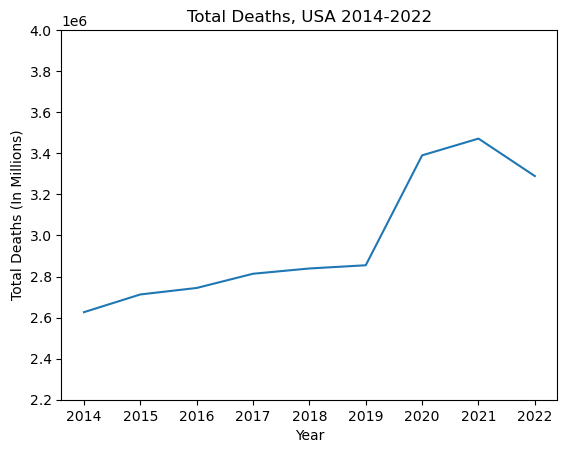

In [16]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
plt.plot(years, all_deaths)
plt.ylim(2200000, 4000000)
plt.title("Total Deaths, USA 2014-2022")
plt.xlabel("Year")
plt.ylabel("Total Deaths (In Millions)")

As we can see, there is a slight steady increase in total deaths from 2014-2019 (which can be expected when the population is steadily rising), before a significant spike in 2020 that does not go away by 2022. This can certainly be attributed to the onset of COVID-19 in the United States in March 2020.

## Suicide

The first objective (and foremost reason I am doing this project) is to figure out how the prevalence of suicides has changed along with the pandemic. Mental health is very important to me, and one thing that the pandemic exacerbated more than most others is the mental health struggles plaguing the younger generation today. As such, there is a level of curiosity in determining whether those struggles corresponded with higher levels of suicide, particularly in comparison to other causes of death.

In [17]:
suicide_14 = []
for index, row in death_14.iterrows():
    suicide_14.append(row["Intentional Self-Harm (Suicide)"])
print(suicide_14)

[3320, 3091, 3408, 3606, 3589, 3552, 3534, 4027, 4034, 3791, 3480, 3394]


Using this framework, I will do the same thing for every year up through 2023. This will allow us to have all of our suicide values in one place.

In [18]:
suicide_15 = []
for index, row in death_15.iterrows():
    suicide_15.append(row["Intentional Self-Harm (Suicide)"])

In [19]:
suicide_16 = []
for index, row in death_16.iterrows():
    suicide_16.append(row["Intentional Self-Harm (Suicide)"])

In [20]:
suicide_17 = []
for index, row in death_17.iterrows():
    suicide_17.append(row["Intentional Self-Harm (Suicide)"])

In [21]:
suicide_18 = []
for index, row in death_18.iterrows():
    suicide_18.append(row["Intentional Self-Harm (Suicide)"])

In [22]:
suicide_19 = []
for index, row in death_19.iterrows():
    suicide_19.append(row["Intentional Self-Harm (Suicide)"])

Note: For 2020-2023 I will have to use the respective tables that they're in, rather than the one from 2014-2019.

In [23]:
suicide_20 = []
for index, row in death_20.iterrows():
    suicide_20.append(row["Intentional Self-Harm (Suicide)"])

In [24]:
suicide_21 = []
for index, row in death_21.iterrows():
    suicide_21.append(row["Intentional Self-Harm (Suicide)"])

In [25]:
suicide_22 = []
for index, row in death_22.iterrows():
    suicide_22.append(row["Intentional Self-Harm (Suicide)"])

In [26]:
suicide_23 = []
for index, row in death_23.iterrows():
    suicide_23.append(row["Intentional Self-Harm (Suicide)"])
print(suicide_23)

[4239.0, 3733.0, nan, nan, nan, nan, nan, nan, nan]


Note that suicide data for 2023 is restricted to only January and February due to the fact that the dataset stopped getting updated. This means our data for 'Post-COVID' will be our smallest sample size.

### First Chart: Suicide Numbers Over Years

This project is about much more than this, but a nice starting point for us to branch off of is simply graphing our suicide counts by year. We could do average or sum - in this case I have chosen to use sums, but averages would work well too.

In [27]:
s_tot_14 = sum(suicide_14) # Summing all values in suicide_14
s_tot_15 = sum(suicide_15)
s_tot_16 = sum(suicide_16)
s_tot_17 = sum(suicide_17)
s_tot_18 = sum(suicide_18)
s_tot_19 = sum(suicide_19)
s_tot_20 = sum(suicide_20)
s_tot_21 = sum(suicide_21)
s_tot_22 = sum(suicide_22)

We are not aggregating 2023 because, again, we only have data for January and February. So unfortunately we can only go up to 2022 for this graph.

Text(0, 0.5, 'Suicide Total')

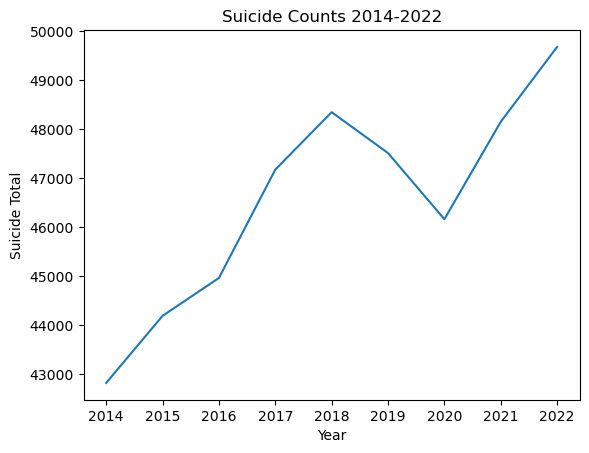

In [28]:
s_tot_all = [s_tot_14, s_tot_15, s_tot_16, s_tot_17, s_tot_18, 
             s_tot_19, s_tot_20, s_tot_21, s_tot_22] #List of combined suicide counts for each year

plt.plot(years, s_tot_all)
plt.title("Suicide Counts 2014-2022")
plt.xlabel("Year")
plt.ylabel("Suicide Total")

This is a good starting point for us to branch out and ask more questions from - it shows that, on the whole, suicides did increase from 2014 to 2022, with a slight dip during the height of COVID-19. This makes sense, as COVID accounted for an outsized portion of deaths in 2020 compared to other years.

## Suicide as a Proportion

Now that we have counts for both suicide and all deaths, we can figure out how much suicide has changed as a total proportion of all deaths.

[42826, 44193, 44965, 47173, 48344, 47511, 46163.0, 48148.0, 49674.0]
[2626418, 2712630, 2744248, 2813503, 2839205, 2854838, 3390079, 3471742, 3289236]


(1.2, 1.8)

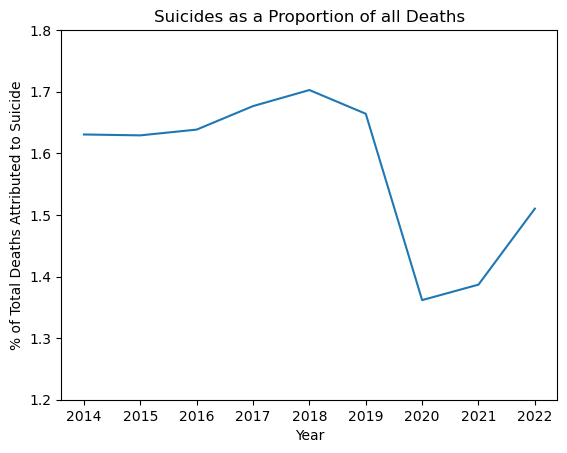

In [45]:
print(s_tot_all)
print(all_deaths)

suicide_proportion = [] # Empty List
for i in range(len(s_tot_all)):
    suicide_proportion.append(100 * s_tot_all[i] / all_deaths[i]) # Loop that divides each element in s_tot_all by 
    # each element in all_deaths, then adds it to suicide_proportion
    
plt.plot(years, suicide_proportion)
plt.xlabel("Year")
plt.ylabel("% of Total Deaths Attributed to Suicide")
plt.title("Suicides as a Proportion of all Deaths")
plt.ylim(1.2, 1.8)

### The COVID Effect

As we can see, COVID-19 is a great equalizer in this experiment. As such, I'm interested in what this chart would look like if COVID deaths were removed.

In [30]:
death_20_non_covid = []
for index, row in death_20.iterrows():
    death_20_non_covid.append(row["All Cause"] - row["COVID-19 (Multiple Cause of Death)"] - 
                    row["COVID-19 (Underlying Cause of Death)"]) # Creates a list of total deaths for 2020, minus
                                                                 # all COVID-related deaths
death_21_non_covid = []
for index, row in death_21.iterrows():
    death_21_non_covid.append(row["All Cause"] - row["COVID-19 (Multiple Cause of Death)"] - 
                    row["COVID-19 (Underlying Cause of Death)"])
    
death_22_non_covid = []
for index, row in death_22.iterrows():
    death_22_non_covid.append(row["All Cause"] - row["COVID-19 (Multiple Cause of Death)"] - 
                    row["COVID-19 (Underlying Cause of Death)"])
    
combined_20_non_covid = sum(death_20_non_covid) # Summing non-Covid deaths in 2020
combined_21_non_covid = sum(death_21_non_covid)
combined_22_non_covid = sum(death_22_non_covid)

all_deaths_non_covid = [combined_14, combined_15, combined_16, combined_17, combined_18, 
              combined_19, combined_20_non_covid, combined_21_non_covid, combined_22_non_covid]
             # Creating List of total non-Covid deaths


Now that we have our new total death list after removing COVID, it is time to recreate our suicide proportion chart.

(1.5, 2.0)

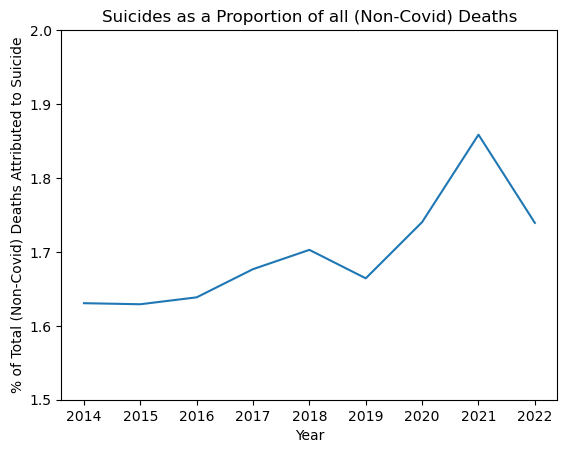

In [46]:
suicide_proportion_non_covid = [] # Empty List
for i in range(len(s_tot_all)):
    suicide_proportion_non_covid.append(100 * s_tot_all[i] / all_deaths_non_covid[i]) # Loop that divides each element in s_tot_all by 
    # each element in all_deaths, then adds it to suicide_proportion
    
plt.plot(years, suicide_proportion_non_covid)
plt.xlabel("Year")
plt.ylabel("% of Total (Non-Covid) Deaths Attributed to Suicide")
plt.title("Suicides as a Proportion of all (Non-Covid) Deaths")
plt.ylim(1.5, 2)

As we can see, looking past the overwhelming number of COVID-related deaths allows us to see that suicides do continue a steady rise from a proportion of death standpoint, increasing by approximately one eighth from 2019 to 2021.

### Another Visualization

Before I move on from this, I would like to provide another vizualization to note how much COVID-19 affected other causes of death. A clustered bar chart will allow us to see all of these proportions together in a pleasing way.

Note: For this chart I will be using our first suicide proportions, because we want all of the data in this chart to be out of the same "whole".

In [58]:
death_20_covid = []
for index, row in death_20.iterrows():
    death_20_covid.append(row["COVID-19 (Multiple Cause of Death)"] + 
                    row["COVID-19 (Underlying Cause of Death)"]) # Creates a list of total COVID-related
                                                                 # deaths for 2020
death_21_covid = []
for index, row in death_21.iterrows():
    death_21_covid.append(row["COVID-19 (Multiple Cause of Death)"] + 
                    row["COVID-19 (Underlying Cause of Death)"])
    
death_22_covid = []
for index, row in death_22.iterrows():
    death_22_covid.append(row["COVID-19 (Multiple Cause of Death)"] + 
                    row["COVID-19 (Underlying Cause of Death)"])


combined_20_covid = sum(death_20_covid) # Summing only Covid deaths in 2020
combined_21_covid = sum(death_21_covid)
combined_22_covid = sum(death_22_covid)

total_covid_deaths = [0, 0, 0, 0, 0, 0, combined_20_covid, combined_21_covid, combined_22_covid] # List of total
                                                                                                  # Covid deaths each year

covid_proportion = []
for i in range(len(total_covid_deaths)):
    covid_proportion.append(100 * total_covid_deaths[i] / all_deaths[i])

In [59]:
sickness_14 = []
for index, row in death_14.iterrows():
    sickness_14.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"]) # Creates List of deaths for 2014 from
                                                                    # other illnesses 

sickness_15 = []
for index, row in death_15.iterrows():
    sickness_15.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
    
sickness_16 = []
for index, row in death_16.iterrows():
    sickness_16.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_17 = []
for index, row in death_17.iterrows():
    sickness_17.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_18 = []
for index, row in death_18.iterrows():
    sickness_18.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_19 = []
for index, row in death_19.iterrows():
    sickness_19.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_20 = []
for index, row in death_20.iterrows():
    sickness_20.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_21 = []
for index, row in death_21.iterrows():
    sickness_21.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
sickness_22 = []
for index, row in death_22.iterrows():
    sickness_22.append(row["Influenza and Pneumonia"] + 
                       row["Chronic Lower Respiratory Diseases"] + 
                       row["Other Diseases of Respiratory System"])
        

In [60]:
combined_14_sickness = sum(sickness_14) # Sums sickness deaths for 2014
combined_15_sickness = sum(sickness_15)
combined_16_sickness = sum(sickness_16)
combined_17_sickness = sum(sickness_17)
combined_18_sickness = sum(sickness_18)
combined_19_sickness = sum(sickness_19)
combined_20_sickness = sum(sickness_20)
combined_21_sickness = sum(sickness_21)
combined_22_sickness = sum(sickness_22)

total_sickness_deaths = [combined_14_sickness, combined_15_sickness,
                         combined_16_sickness, combined_17_sickness,
                         combined_18_sickness, combined_19_sickness,
                         combined_20_sickness, combined_21_sickness,
                         combined_22_sickness] # List of total sickness deaths each year
 
sickness_proportion = []
for i in range(len(total_sickness_deaths)):
    sickness_proportion.append(100 * total_sickness_deaths[i] / all_deaths[i])


Now that we have our proportion lists ready to go, we can go ahead and create our clustered bar chart.

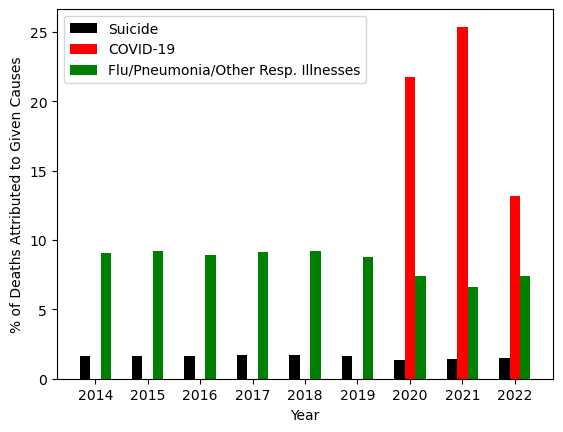

In [62]:
x = np.arange(9) + 2014
width = 0.2
plt.bar(x-0.2, suicide_proportion, width, color='black')
plt.bar(x, covid_proportion, width, color='red')
plt.bar(x+0.2, sickness_proportion, width, color='green')
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("% of Deaths Attributed to Given Causes")
plt.legend(["Suicide", "COVID-19", "Flu/Pneumonia/Other Resp. Illnesses"])

***NEXT UPDATE: TURNING THE CLUSTERED CHART INTO 3 HIGHEST DEATHS PER YEAR. CHECK SITE FOR NATURAL CAUSES INFO.***

### Month-to-month Measurements

I'm interested in diving deeper into the month-to-month numbers in general, but we'll start with specifically suicides, for one very distinct reason - many people suffer from Seasonal Affective Disorder (SAD), also known as Seasonal Depression. This is typically observed to occur in the fall-to-winter range, so I'm curious to see if there are generally higher suicide numbers in the (Nothern Hemisphere's) colder months.

I'm going to display the graphs in three blocks, so you can get a good view of each.

Text(0.5, 1.0, 'Suicides by Month, 2016')

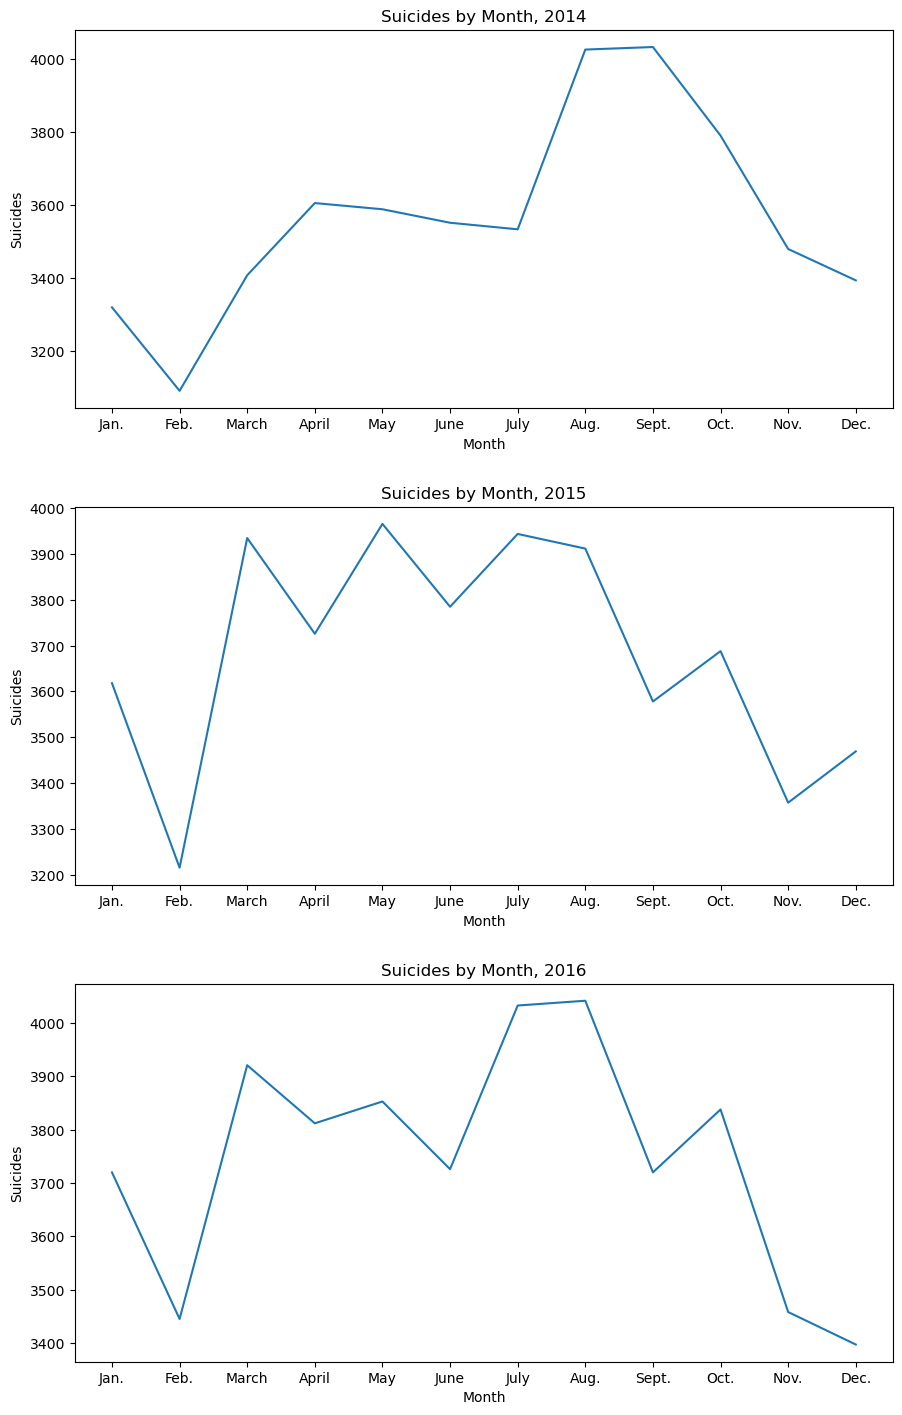

In [33]:
months = ["Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
fig, axs = plt.subplots(3, figsize=(10, 15))
fig.tight_layout(pad=5.0)

axs[0].plot(months, suicide_14)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Suicides')
axs[0].set_title('Suicides by Month, 2014')

axs[1].plot(months, suicide_15)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Suicides')
axs[1].set_title('Suicides by Month, 2015')

axs[2].plot(months, suicide_16)
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Suicides')
axs[2].set_title('Suicides by Month, 2016')

Text(0.5, 1.0, 'Suicides by Month, 2019')

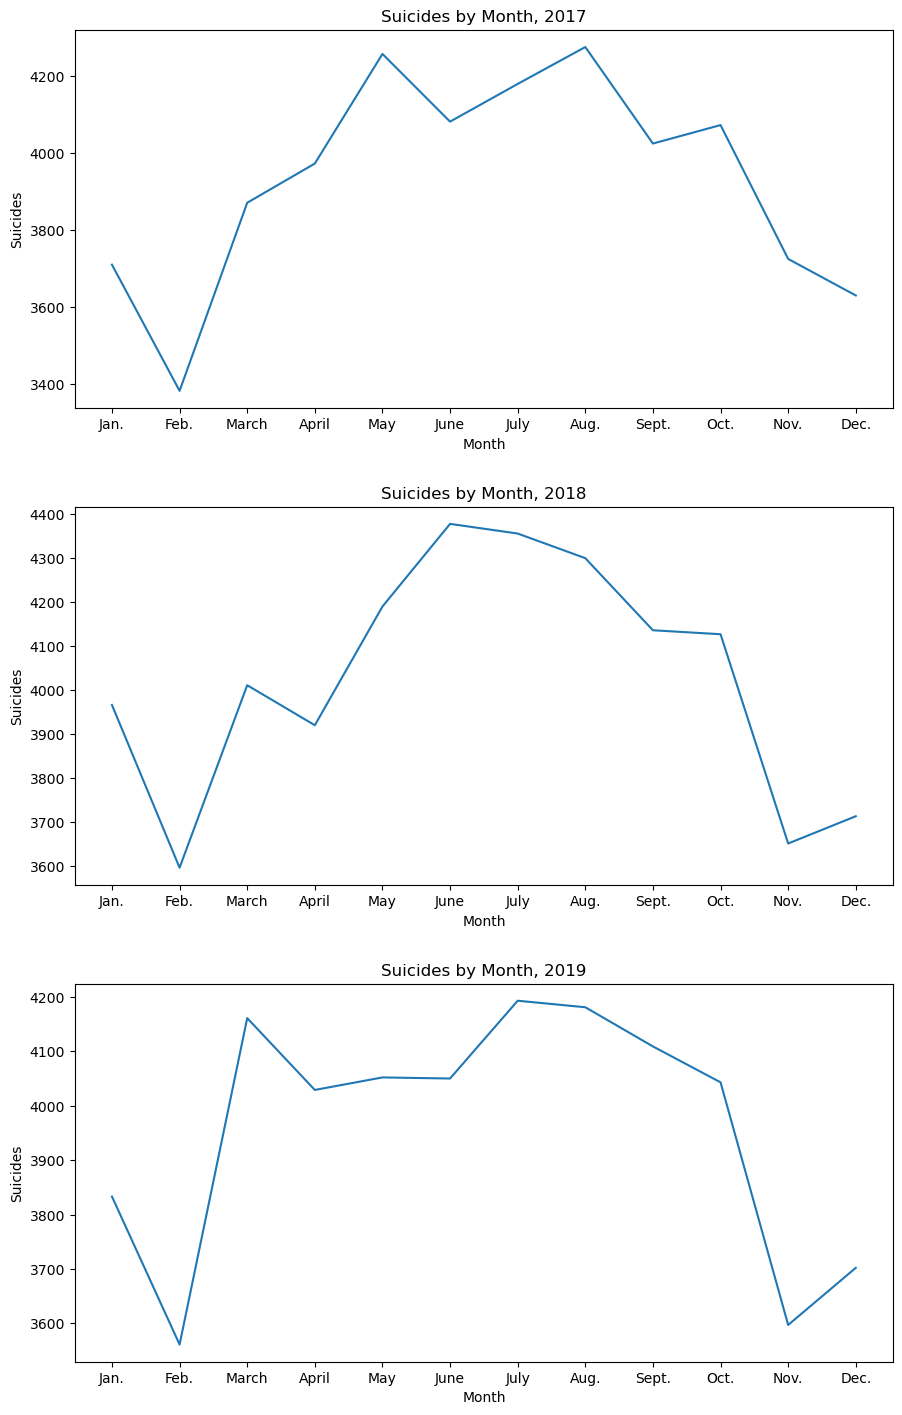

In [34]:
fig, axs = plt.subplots(3, figsize=(10, 15))
fig.tight_layout(pad=5.0)

axs[0].plot(months, suicide_17)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Suicides')
axs[0].set_title('Suicides by Month, 2017')

axs[1].plot(months, suicide_18)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Suicides')
axs[1].set_title('Suicides by Month, 2018')

axs[2].plot(months, suicide_19)
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Suicides')
axs[2].set_title('Suicides by Month, 2019')

Text(0.5, 1.0, 'Suicides by Month, 2022')

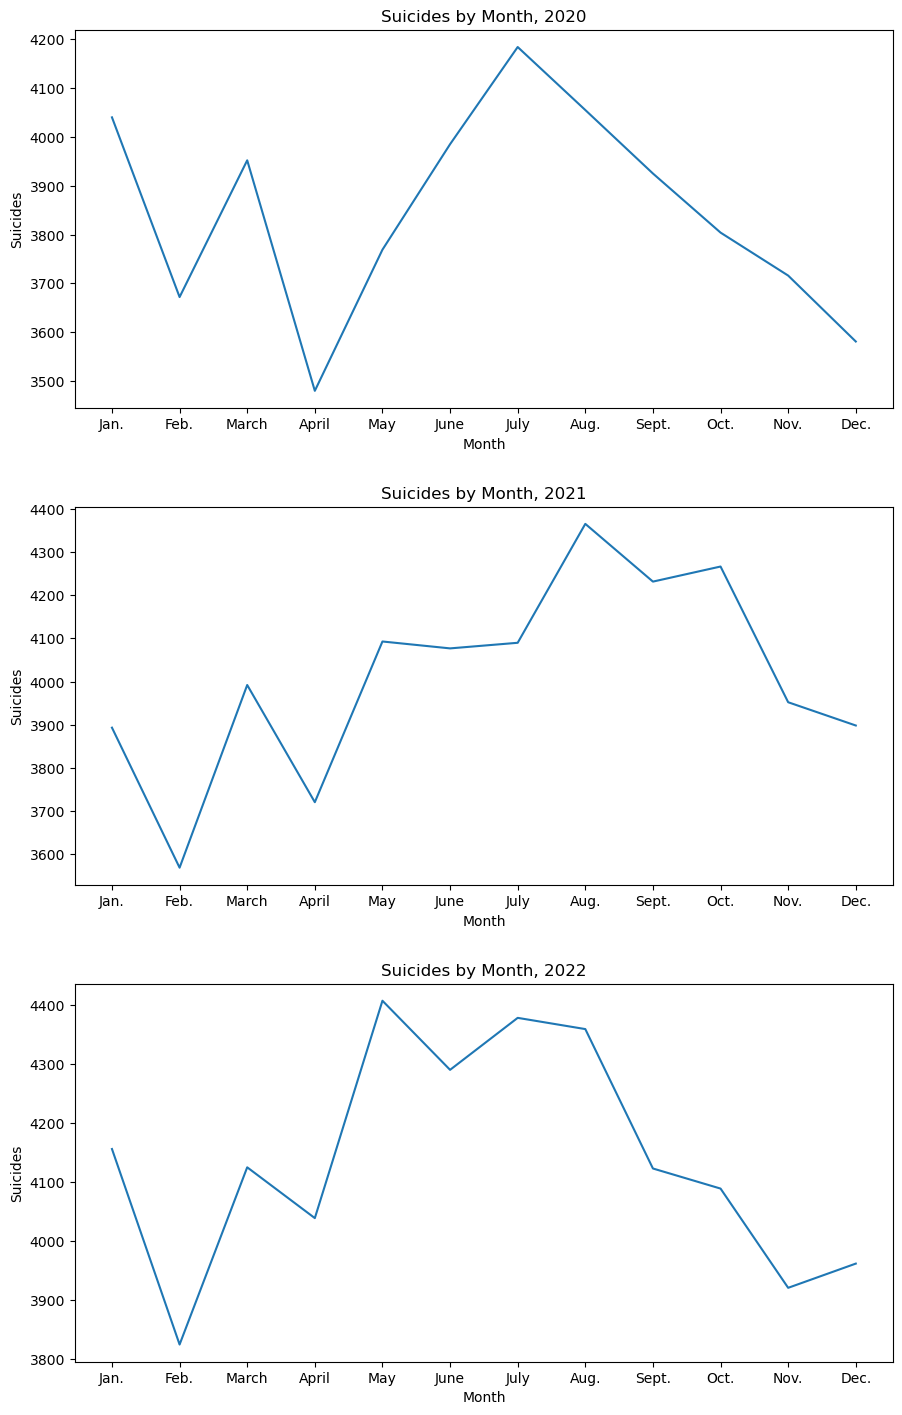

In [35]:
fig, axs = plt.subplots(3, figsize=(10, 15))
fig.tight_layout(pad=5.0)

axs[0].plot(months, suicide_20)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Suicides')
axs[0].set_title('Suicides by Month, 2020')

axs[1].plot(months, suicide_21)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Suicides')
axs[1].set_title('Suicides by Month, 2021')

axs[2].plot(months, suicide_22)
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Suicides')
axs[2].set_title('Suicides by Month, 2022')

#### Monthly Data Conclusion

Our month-to-month data has given a truly bizarre result - aside from the outlier of 2020 (which will have warped numbers over these months due to COVID-19), suicides are actually significantly more common in the *warmer* months of the year, sometimes by as much as 25% compared to the winter months.

I find this to be very unusual - it leads me to wonder if there are any other patterns associated with time of the year.

## Other Causes of Death - The Seasonal Effect

Going through every cause of death that HHS provides us with will take a very long time - so I will go through a few that I think would be most likely to change with the seasons. This mainly includes various illness-related causes, such as the flu.

## Citations

Mayo Foundation for Medical Education and Research. (n.d.). Seasonal affective disorder (SAD). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/seasonal-affective-disorder/symptoms-causes/syc-20364651 